**Importing Genius lyrics for any artist's album**

*(Draft)*

In [1]:
import lyricsgenius as lg

import re
import datascience as ds
from datascience import Table

from PIL import Image
import requests

import warnings
from unidecode import unidecode
warnings.filterwarnings('ignore')

A Genius client access token is needed for this code to run

In [2]:
client_access_token = 'insert genius client access token'

In [3]:
genius = lg.Genius(client_access_token,
            skip_non_songs=False, excluded_terms=['(Remix)'],
            remove_section_headers=True, verbose=True)

In [4]:
name = input("Enter artist's name: ")
album_name = input("Enter album title: ")

Enter artist's name: Mac Miller
Enter album title: Swimming


In [5]:
artist = genius.search_artist(name, max_songs=3, sort='popularity')

Searching for songs by Mac Miller...

Song 1: "Self Care"
Song 2: "Good News"
Song 3: "Weekend"

Reached user-specified song limit (3).
Done. Found 3 songs.


In [6]:
album = genius.search_album(album_name, name)
album_dict = genius.search_albums(album_name, per_page = 1)

Searching for "Swimming" by Mac Miller...


The following cell retrieves the album id needed for genius.album_tracks(int) from album (of type dict)

In [7]:
album_id = album_dict.get('sections')[0].get('hits')[0].get('result').get('id')

In [8]:
album_info = genius.album_tracks(str(album_id)).get('tracks')

for tracks in album_info:
    track_count = tracks.get('number')
num_tracks = list(range(track_count))

track_names = []

for n in num_tracks:
    track_names.append(album_info[n]['song']['title'])

In [9]:
def album_to_lyrics(album):
    
    song_lyrics = []
    
    for i in range(len(album)):
       
        i += 0 
        
        song = artist.song(album[0+i])
        lyrics = song.lyrics
        
        # reformat the lyrics
        lyrics = lyrics.replace('\n', ' ')
        lyrics = re.sub(r"[0-9]*EmbedShare URLCopyEmbedCopy", '', lyrics)
        lyrics = unidecode(lyrics)
        song_lyrics.append(lyrics)
        
        
    titles = []
    words = []
    
    for i in range(len(album)):
        titles.append(album[i])
    for i in range(len(album)):
        words.append(song_lyrics[i])
        
    album_table = ds.Table().with_columns("Title", titles, 
                  "Lyrics", words) # include if csv table is desired output --> .to_csv(album_title)
        
    return album_table

In [10]:
album_to_lyrics(track_names)

Searching for "Come Back to Earth" by Mac Miller...
Done.
Searching for "Hurt Feelings" by Mac Miller...
Done.
Searching for "What’s the Use?" by Mac Miller...
Done.
Searching for "Perfecto" by Mac Miller...
Done.
Searching for "Wings" by Mac Miller...
Done.
Searching for "Ladders" by Mac Miller...
Done.
Searching for "Small Worlds" by Mac Miller...
Done.
Searching for "Conversation, Pt. 1" by Mac Miller...
Done.
Searching for "Dunno" by Mac Miller...
Done.
Searching for "Jet Fuel" by Mac Miller...
Done.
Searching for "2009" by Mac Miller...
Done.
Searching for "So It Goes" by Mac Miller...
Done.


Title,Lyrics
Come Back to Earth,My regrets look just like texts I shouldn't send And I g ...
Hurt Feelings,"Yeah Yeah-yeah, yeah-yeah Whoa-whoa-whoa-whoa-whoa-whoa- ..."
What’s the Use?,"Yeah You can love it, you can leave it They say you're ..."
Perfecto,"Yeah, yeah, yeah, yeah, yeah Yeah, yeah Yeah, yeah, yeah ..."
Self Care,"Mhm, mhm Okay Yeah, yeah, yeah, yeah Yeah, yeah, yeah Do ..."
Wings,Yeah Well I got a bone to pick like roses (Roses) I ain ...
Ladders,Somehow we gotta find a way No matter how many miles it ...
Small Worlds,"Yeah, yeah The world is so small 'til it ain't, yeah I' ..."
"Conversation, Pt. 1","We ain't on the same shit, no way You ain't from my plan ..."
Dunno,Yeah Hmm-hmm Hmm-hmm Yeah She do whatever she like And ...


Cover Art: 


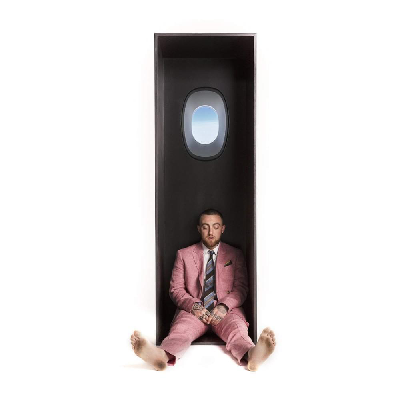

In [11]:
print('Cover Art: ')
im = Image.open(requests.get(album.cover_art_url, stream=True).raw)
im.resize((400,400))